# DataSet

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [24]:
train = pd.read_csv('train.csv')

In [25]:
pd.set_option('display.max_columns',None)

In [26]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Handle skewness in numerical variables
4. Handle categorical variables by using dummies
5. Categorical variables: remove rare labels
6. Standadize the values of the variables to the same range

In [27]:
numerical_features = [feature for feature in train.columns if train[feature].dtype!='O']

In [28]:
categorical_features = [feature for feature in train.columns if train[feature].dtype=='O']

# Missing Values

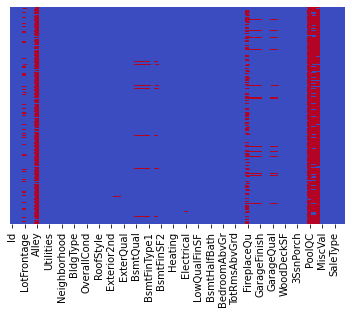

In [8]:
# Heatmap showing the missing values in each feature
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')
plt.show()

In [29]:
numerical_features_nan = [feature for feature in numerical_features if train[feature].isnull().sum()>0]
for feature in numerical_features_nan:
    print('{} : {} % of missing values'.format(feature,round(train[feature].isnull().mean()*100,2)))

LotFrontage : 17.74 % of missing values
MasVnrArea : 0.55 % of missing values
GarageYrBlt : 5.55 % of missing values


In [30]:
for feature in numerical_features_nan:
    train[feature+'_nan'] = np.where(train[feature].isnull(),1,0)
    train[feature].fillna(train[feature].mean(),inplace=True)

In [31]:
train[numerical_features_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [32]:
categorical_features_nan = [feature for feature in categorical_features if train[feature].isnull().sum()>0]
for feature in categorical_features_nan:
    print('{} : {} % of missing values'.format(feature,round(train[feature].isnull().mean()*100,2)))

Alley : 93.77 % of missing values
MasVnrType : 0.55 % of missing values
BsmtQual : 2.53 % of missing values
BsmtCond : 2.53 % of missing values
BsmtExposure : 2.6 % of missing values
BsmtFinType1 : 2.53 % of missing values
BsmtFinType2 : 2.6 % of missing values
Electrical : 0.07 % of missing values
FireplaceQu : 47.26 % of missing values
GarageType : 5.55 % of missing values
GarageFinish : 5.55 % of missing values
GarageQual : 5.55 % of missing values
GarageCond : 5.55 % of missing values
PoolQC : 99.52 % of missing values
Fence : 80.75 % of missing values
MiscFeature : 96.3 % of missing values


In [33]:
train.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [36]:
categorical_features_nan.remove('Alley')
categorical_features_nan.remove('PoolQC')
categorical_features_nan.remove('Fence')
categorical_features_nan.remove('MiscFeature')

In [37]:
for feature in categorical_features_nan:
    train[feature].fillna(train[feature].mode()[0],inplace=True)

In [38]:
train[categorical_features_nan].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [39]:
train.isnull().sum().sum()

0

In [40]:
train.shape

(1460, 80)

## Temporal Variables

In [41]:
temporal_features = [feature for feature in train.columns if 'Yr' in feature or 'Year' in feature]

In [42]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'GarageYrBlt_nan']

In [43]:
temporal_features.remove('GarageYrBlt_nan')
temporal_features.remove('YrSold')

In [44]:
for feature in temporal_features:
    train[feature] = train['YrSold'] - train[feature]

In [45]:
train[temporal_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Handling Skewness of Continuous Variables

In [46]:
data1 = train.copy()
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,5.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500,0,0,0
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500,0,0,0
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500,0,0,0
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000,0,0,0
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000,0,0,0


In [47]:
continuous_features = [feature for feature in numerical_features if data1[feature].nunique()>25 and feature not in temporal_features+['Id']]

In [48]:
continuous_features

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

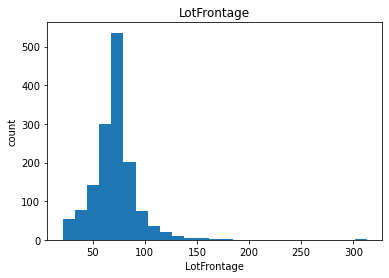

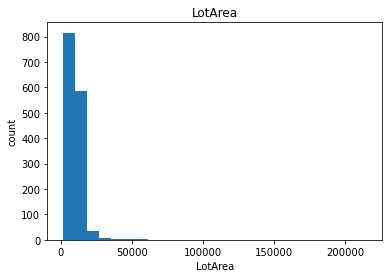

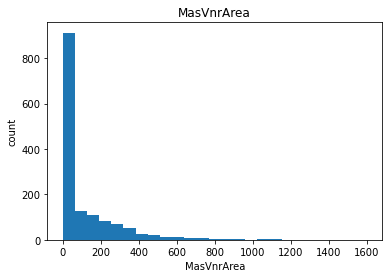

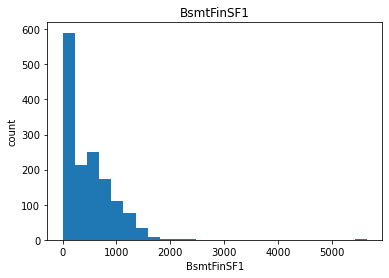

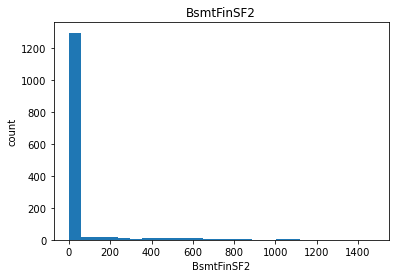

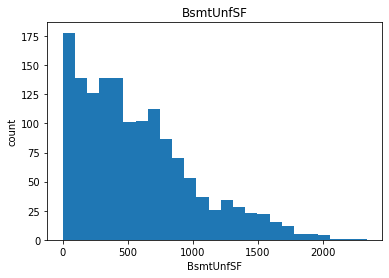

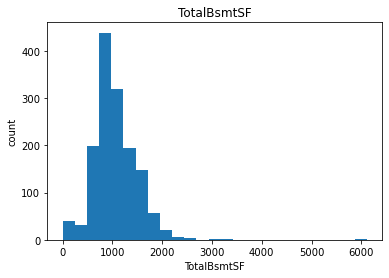

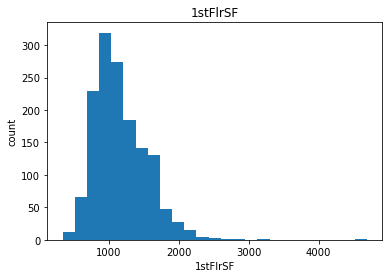

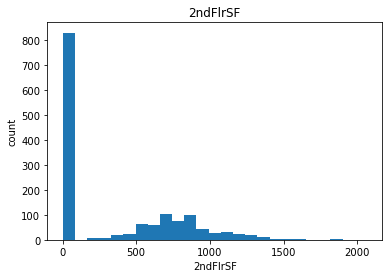

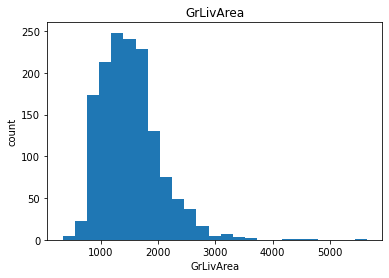

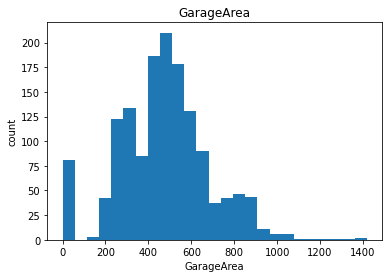

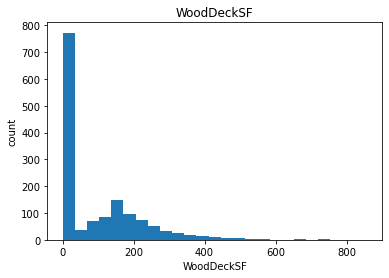

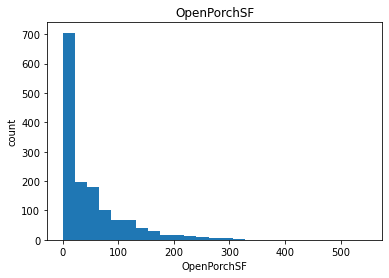

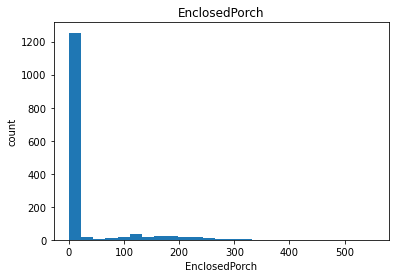

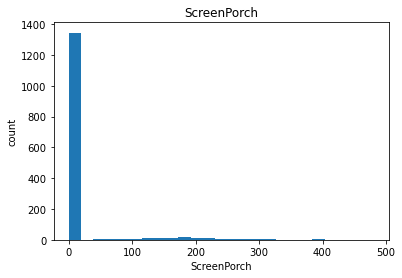

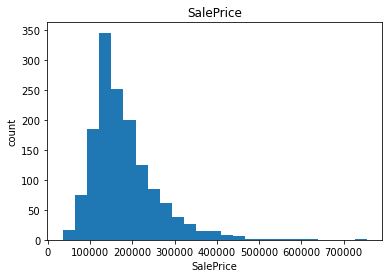

In [49]:
for feature in continuous_features:
    plt.hist(data1[feature],bins=25)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

In [29]:
# The values of any feature should not be zero to apply log transform
continuous_features_log = [feature for feature in continuous_features if all(data1[feature]) and feature!='SalePrice']

In [30]:
continuous_features_log

['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']

In [31]:
for feature in continuous_features_log:
    data1[feature] = np.log(data1[feature])

In [32]:
data1[continuous_features_log].head()

,LotFrontage,LotArea,1stFlrSF,GrLivArea
0,4.174387,9.041922,6.752270,7.444249
1,4.382027,9.169518,7.140453,7.140453
2,4.219508,9.328123,6.824374,7.487734
3,4.094345,9.164296,6.867974,7.448334
4,4.430817,9.565214,7.043160,7.695303


In [33]:
data1.shape

(1460, 80)

## Handle Categorical Features

In [34]:
categorical_features.remove('Alley')
categorical_features.remove('Fence')
categorical_features.remove('MiscFeature')
categorical_features.remove('PoolQC')

In [35]:
len(categorical_features)

39

In [36]:
test = pd.read_csv('modified_test_data.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
0,1461,20,RH,4.382027,9.360655,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,TA,5,Typ,0,Gd,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,1,0,1
1,1462,20,RL,4.394449,9.565704,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Gd,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,1,1,1
2,1463,60,RL,4.304065,9.534595,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,1,0,1
3,1464,60,RL,4.356709,9.208138,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,0,6,2010,WD,Normal,1,1,1
4,1465,120,RL,3.761200,8.518193,Pave,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Gd,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,0,1,2010,WD,Normal,1,0,1


In [37]:
final_df = pd.concat((data1,test),axis=0)

In [38]:
final_df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan
1454,2915,160,RM,3.044522,7.568379,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,TA,5,Typ,0,Gd,Attchd,28.278783,Unf,0.0,0.0,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,NaN,1,0,1
1455,2916,160,RM,3.044522,7.546446,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,36,36,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,TA,6,Typ,0,Gd,CarPort,36.000000,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,0,4,2006,WD,Abnorml,NaN,1,0,1
1456,2917,20,RL,5.075174,9.903488,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,46,10,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,46.000000,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,0,9,2006,WD,Abnorml,NaN,1,0,1
1457,2918,85,RL,4.127134,9.253496,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,14,14,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,6.877296,0,0,6.877296,0.0,1.0,1,0,3,1,TA,6,Typ,0,Gd,Attchd,28.278783,Unf,0.0,0.0,TA,TA,Y,80,32,0,0,0,0,700,7,2006,WD,Normal,NaN,1,0,1
1458,2919,60,RL,4.304065,9.172327,Pave,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,13,12,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,6.903747,1004,0,7.600902,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,13.000000,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,0,11,2006,WD,Normal,NaN,1,1,1


In [39]:
# Onehot Encoding the categorical variables
def One_hot_encoding(categorical_features):
    encoded_data = final_df
    i=0
    for feature in categorical_features:
        
        print(feature)
        df1=pd.get_dummies(final_df[feature],drop_first=True)
        
        final_df.drop([feature],axis=1,inplace=True)
        if i==0:
            encoded_data=df1.copy()
        else:
            
            encoded_data=pd.concat([encoded_data,df1],axis=1)
        i=i+1
       
        
    encoded_data=pd.concat([final_df,encoded_data],axis=1)
        
    return encoded_data

In [40]:
Encoded_data = One_hot_encoding(categorical_features)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [41]:
Encoded_data.shape

(2919, 241)

In [42]:
final_df = Encoded_data.loc[:,~Encoded_data.columns.duplicated()]

In [43]:
final_df.shape

(2919, 181)

## Splitting data into train and test sets

In [44]:
train_new = final_df.iloc[:1460,:]
test_new = final_df.iloc[1460:,:]

In [45]:
train_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1,60,4.174387,9.041922,7,5,5,5,196.0,706.0,0.0,150.0,856.0,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,8,0,5.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,4.382027,9.169518,6,8,31,31,0.0,978.0,0.0,284.0,1262.0,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,6,1,31.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,4.219508,9.328123,7,5,7,6,162.0,486.0,0.0,434.0,920.0,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,6,1,7.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,4.094345,9.164296,7,5,91,36,0.0,216.0,0.0,540.0,756.0,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,7,1,8.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,4.430817,9.565214,8,5,8,8,350.0,655.0,0.0,490.0,1145.0,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,9,1,8.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [46]:
test_new.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LotFrontage_nan,MasVnrArea_nan,GarageYrBlt_nan,FV,RH,RL,RM,Pave,IR2,IR3,Reg,HLS,Low,Lvl,NoSeWa,CulDSac,FR2,FR3,Inside,Mod,Sev,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,Mitchel,NAmes,NPkVill,NWAmes,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,Feedr,Norm,PosA,PosN,RRAe,RRAn,RRNe,RRNn,2fmCon,Duplex,Twnhs,TwnhsE,1.5Unf,1Story,2.5Fin,2.5Unf,2Story,SFoyer,SLvl,Gable,Gambrel,Hip,Mansard,Shed,CompShg,Membran,Metal,Roll,Tar&Grv,WdShake,WdShngl,AsphShn,BrkComm,BrkFace,CBlock,CemntBd,HdBoard,ImStucc,MetalSd,Plywood,Stone,Stucco,VinylSd,Wd Sdng,WdShing,Brk Cmn,CmentBd,Other,Wd Shng,None,Fa,Gd,TA,Po,PConc,Slab,Wood,Mn,No,BLQ,GLQ,LwQ,Rec,Unf,GasA,GasW,Grav,OthW,Wall,Y,FuseF,FuseP,Mix,SBrkr,Maj2,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD,AdjLand,Alloca,Family,Normal,Partial
0,1461,20,4.382027,9.360655,5,6,49,49,0.0,468.0,144.0,270.0,882.0,6.797940,0,0,6.797940,0.0,0.0,1,0,2,1,5,0,49.0,1.0,730.0,140,0,0,0,120,0,0,6,2010,NaN,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,1462,20,4.394449,9.565704,6,6,52,52,108.0,923.0,0.0,406.0,1329.0,7.192182,0,0,7.192182,0.0,0.0,1,1,3,1,6,0,52.0,1.0,312.0,393,36,0,0,0,0,12500,6,2010,NaN,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,1463,60,4.304065,9.534595,5,5,13,12,0.0,791.0,0.0,137.0,928.0,6.833032,701,0,7.395722,0.0,0.0,2,1,3,1,6,1,13.0,2.0,482.0,212,34,0,0,0,0,0,3,2010,NaN,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1464,60,4.356709,9.208138,6,6,12,12,20.0,602.0,0.0,324.0,926.0,6.830874,678,0,7.380256,0.0,0.0,2,1,3,1,7,1,12.0,2.0,470.0,360,36,0,0,0,0,0,6,2010,NaN,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1465,120,3.761200,8.518193,8,5,18,18,0.0,263.0,0.0,1017.0,1280.0,7.154615,0,0,7.154615,0.0,0.0,2,0,2,1,5,0,18.0,2.0,506.0,0,82,0,0,144,0,0,1,2010,NaN,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [47]:
test_new.shape

(1459, 181)

In [198]:
xtrain = train_new.drop(['SalePrice','Id'],axis=1)
ytrain = train_new['SalePrice']

In [199]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

In [205]:
feature_sel_model = SelectFromModel(RandomForestRegressor(random_state=5),threshold = 0.00075)
feature_sel_model.fit(xtrain, ytrain)

SelectFromModel(estimator=RandomForestRegressor(random_state=5),
                threshold=0.00075)

In [206]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True,  True,
       False, False, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [248]:
selected_features = xtrain.columns[feature_sel_model.get_support()]
xtrain_new = xtrain[selected_features]
xtrain_new.shape

(1460, 42)

In [245]:
xtest_new = test_new[selected_features]
xtest_new.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,RM,Reg,Crawfor,Edwards,NoRidge,Gd,TA,No,Y,Attchd,Detchd,RFn
0,20,4.382027,9.360655,5,6,49,49,0.0,468.0,270.0,882.0,6.797940,0,6.797940,0.0,1,0,2,1,5,0,49.0,1.0,730.0,140,0,0,120,6,2010,0,1,0,0,0,0,1,1,1,1,0,0
1,20,4.394449,9.565704,6,6,52,52,108.0,923.0,406.0,1329.0,7.192182,0,7.192182,0.0,1,1,3,1,6,0,52.0,1.0,312.0,393,36,0,0,6,2010,0,0,0,0,0,0,1,1,1,1,0,0
2,60,4.304065,9.534595,5,5,13,12,0.0,791.0,137.0,928.0,6.833032,701,7.395722,0.0,2,1,3,1,6,1,13.0,2.0,482.0,212,34,0,0,3,2010,0,0,0,0,0,0,1,1,1,1,0,0
3,60,4.356709,9.208138,6,6,12,12,20.0,602.0,324.0,926.0,6.830874,678,7.380256,0.0,2,1,3,1,7,1,12.0,2.0,470.0,360,36,0,0,6,2010,0,0,0,0,0,0,1,1,1,1,0,0
4,120,3.761200,8.518193,8,5,18,18,0.0,263.0,1017.0,1280.0,7.154615,0,7.154615,0.0,2,0,2,1,5,0,18.0,2.0,506.0,0,82,0,144,1,2010,0,0,0,0,0,1,0,1,1,1,0,1


In [208]:
selected_features

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'RM',
       'Reg', 'Crawfor', 'Edwards', 'NoRidge', 'Gd', 'TA', 'No', 'Y', 'Attchd',
       'Detchd', 'RFn'],
      dtype='object')

## Scaling

In [214]:
from sklearn.preprocessing import StandardScaler

In [215]:
xtrain_scale = xtrain_new.copy()
xtest_scale = test_new[selected_features].copy()

In [216]:
scaler = StandardScaler()
scaler.fit(xtrain_scale)

StandardScaler()

In [220]:
xtrain_scale = pd.DataFrame(scaler.transform(xtrain_scale),columns = xtrain_new.columns)
xtrain_scale.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,RM,Reg,Crawfor,Edwards,NoRidge,Gd,TA,No,Y,Attchd,Detchd,RFn
0,0.073375,-0.084142,-0.133231,0.651479,-0.517200,-1.043259,-0.869941,0.511418,0.575425,-0.944591,-0.459303,-0.803570,1.161852,0.529260,1.107810,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,-1.011871,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.270208,-1.599111,0.138777,-0.418955,0.760512,-0.190252,-0.271163,-0.169981,1.411313,-1.278819,0.687938,0.263813,0.731591,-0.600559,1.568348
1,-0.872563,0.563447,0.113442,-0.071836,2.179628,-0.183465,0.390141,-0.574410,1.171992,-0.641228,0.466465,0.418585,-0.795163,-0.381846,-0.819964,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.070362,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.270208,-0.489110,-0.614439,-0.418955,0.760512,-0.190252,-0.271163,-0.169981,-0.708560,0.781971,-1.453618,0.263813,0.731591,-0.600559,1.568348
2,0.073375,0.056580,0.420061,0.651479,-0.517200,-0.977121,-0.821476,0.323060,0.092907,-0.301643,-0.313369,-0.576560,1.189351,0.659675,1.107810,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,-0.928623,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.270208,0.990891,0.138777,-0.418955,-1.314904,-0.190252,-0.271163,-0.169981,1.411313,-1.278819,-1.453618,0.263813,0.731591,-0.600559,1.568348
3,0.309859,-0.333780,0.103347,0.651479,-0.517200,1.800676,0.632464,-0.574410,-0.499274,-0.061670,-0.687324,-0.439287,0.937276,0.541511,1.107810,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,-0.886998,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.270208,-1.599111,-1.367655,-0.418955,-1.314904,5.256182,-0.271163,-0.169981,-0.708560,0.781971,0.687938,0.263813,-1.366883,1.665116,-0.637614
4,0.073375,0.715614,0.878409,1.374795,-0.517200,-0.944052,-0.724547,1.364570,0.463568,-0.174865,0.199680,0.112267,1.617877,1.282191,1.107810,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,-0.886998,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.270208,2.100892,0.138777,-0.418955,-1.314904,-0.190252,-0.271163,5.883006,1.411313,-1.278819,-1.453618,0.263813,0.731591,-0.600559,1.568348


In [222]:
xtest_scale = pd.DataFrame(scaler.transform(xtest_scale),columns = selected_features)
xtest_scale.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,RM,Reg,Crawfor,Edwards,NoRidge,Gd,TA,No,Y,Attchd,Detchd,RFn
0,-0.872563,0.563447,0.482952,-0.795151,0.381743,0.411777,1.262505,-0.574410,0.053428,-0.672923,-0.400017,-0.659783,-0.795163,-1.409067,-0.819964,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,0.819601,-1.026858,1.202536,0.365179,-0.704483,-0.359325,1.882709,-0.119110,1.64521,-0.418955,0.760512,-0.190252,-0.271163,-0.169981,-0.708560,0.781971,0.687938,0.263813,0.731591,-0.600559,-0.637614
1,-0.872563,0.602190,0.879358,-0.071836,0.381743,0.510984,1.407899,0.023903,1.051363,-0.365032,0.619239,0.581449,-0.795163,-0.226707,-0.819964,-1.026041,1.227585,0.163779,-0.211454,-0.318683,-0.951226,0.944474,-1.026858,-0.753188,2.384400,-0.160950,-0.359325,-0.270208,-0.119110,1.64521,-0.418955,-1.314904,-0.190252,-0.271163,-0.169981,-0.708560,0.781971,0.687938,0.263813,0.731591,-0.600559,-0.637614
2,0.073375,0.320299,0.819217,-0.795151,-0.517200,-0.778707,-0.530688,-0.574410,0.761852,-0.974021,-0.295127,-0.549301,0.811239,0.383723,-0.819964,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,-0.678876,0.311725,0.042202,0.939819,-0.191147,-0.359325,-0.270208,-1.229111,1.64521,-0.418955,-1.314904,-0.190252,-0.271163,-0.169981,-0.708560,0.781971,0.687938,0.263813,0.731591,-0.600559,-0.637614
3,0.073375,0.484485,0.188102,-0.071836,0.381743,-0.811776,-0.530688,-0.463612,0.347326,-0.550672,-0.299687,-0.556094,0.758532,0.337340,-0.819964,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,-0.720501,0.311725,-0.013943,2.121024,-0.160950,-0.359325,-0.270208,-0.119110,1.64521,-0.418955,-1.314904,-0.190252,-0.271163,-0.169981,-0.708560,0.781971,0.687938,0.263813,0.731591,-0.600559,-0.637614
4,1.492282,-1.372796,-1.145716,1.374795,-0.517200,-0.613362,-0.239900,-0.574410,-0.396190,1.018211,0.507509,0.463174,-0.795163,-0.339372,-0.819964,0.789741,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-0.470755,0.311725,0.154492,-0.752176,0.533564,-0.359325,2.313293,-1.969111,1.64521,-0.418955,-1.314904,-0.190252,-0.271163,-0.169981,1.411313,-1.278819,0.687938,0.263813,0.731591,-0.600559,1.568348


In [223]:
#train_new.to_csv('train_new.csv')
#test_new.to_csv('test_new.csv')

## Model Building

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

### Linear Regression

In [224]:
LR=LinearRegression()
LR.fit(xtrain_scale,ytrain)
LR_ypred=LR.predict(xtest_scale)

In [225]:
LR_ypred

array([118981.39380443, 160365.62019654, 173383.04308127, ...,
       170858.52639876, 122746.12751648, 251446.8681867 ])

### Random Forest

In [249]:
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [252]:
rf = RandomForestRegressor()

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,
                               n_iter=50,cv=3,
                               verbose=2, random_state=45, n_jobs = -1)

rf_random.fit(xtrain_scale,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=45, verbose=2)

In [253]:
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [254]:
rf_random.best_estimator_

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      n_estimators=200)

In [255]:
rf = RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                          n_estimators=200,random_state=45)
rf.fit(xtrain_scale,ytrain)

RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                      n_estimators=200, random_state=45)

In [256]:
rf_pred = rf.predict(xtest_scale)
rf_pred

array([125315.045, 152870.125, 180110.32 , ..., 166523.31 , 112812.875,
       237762.895])

### Gradient Boosting

In [257]:
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
learning_rate = [0.1, 0.05, 0.001, 0.005, 0.0001]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'learning_rate': learning_rate}
pprint(random_grid)

{'learning_rate': [0.1, 0.05, 0.001, 0.005, 0.0001],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [258]:
gb = GradientBoostingRegressor()

gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, 
                               n_iter=50,cv=3,
                               verbose=2, random_state=45, n_jobs = -1)

gb_random.fit(xtrain_scale,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    5.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  4.4min finished


RandomizedSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.1, 0.05, 0.001,
                                                          0.005, 0.0001],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=45, verbose=2)

In [259]:
gb_random.best_estimator_

GradientBoostingRegressor(learning_rate=0.005, max_depth=10,
                          max_features='sqrt', min_samples_leaf=4,
                          min_samples_split=5, n_estimators=2000)

In [260]:
gb = GradientBoostingRegressor(learning_rate=0.005, max_depth=10,
                          max_features='sqrt', min_samples_leaf=4,
                          min_samples_split=5, n_estimators=2000,random_state=45)

gb.fit(xtrain_scale,ytrain)

GradientBoostingRegressor(learning_rate=0.005, max_depth=10,
                          max_features='sqrt', min_samples_leaf=4,
                          min_samples_split=5, n_estimators=2000,
                          random_state=45)

In [261]:
gb_pred = gb.predict(xtest_scale)
gb_pred

array([127850.07355252, 154441.47744591, 184429.06513313, ...,
       173116.72371988, 114454.42987505, 234185.23442059])

## Bagging Regressor

In [314]:
from pprint import pprint
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 50, num = 5)]
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False], 'n_estimators': [10, 20, 30, 40, 50]}


In [315]:
rf = RandomForestRegressor(n_estimators=200,random_state=50)
bagging = BaggingRegressor(base_estimator=rf)

bagging_random = RandomizedSearchCV(estimator=bagging,param_distributions=random_grid,
                                    n_iter=10,cv=3,
                                    verbose=1,random_state=50, n_jobs=-1)

bagging_random.fit(xtrain_scale,ytrain)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.4min finished


RandomizedSearchCV(cv=3,
                   estimator=BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=200,
                                                                                   random_state=50)),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'n_estimators': [10, 20, 30, 40, 50]},
                   random_state=50, verbose=1)

In [316]:
bagging_random.best_estimator_

BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=200,
                                                      random_state=50),
                 n_estimators=40)

In [317]:
bagging = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=200,
                                                      random_state=50),
                 n_estimators=40,random_state=45)

In [318]:
bagging.fit(xtrain_scale,ytrain)

BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=200,
                                                      random_state=50),
                 n_estimators=40, random_state=45)

In [319]:
bag_pred = bagging.predict(xtest_scale)
bag_pred

array([127270.705875, 154749.3125  , 177421.8445  , ..., 161076.17475 ,
       119242.9995  , 233163.628875])

## xgboost

In [293]:
import xgboost

In [307]:
xgreg = xgboost.XGBRegressor()

In [306]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [305]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=xgreg,
            param_distributions=hyperparameter_grid,
            n_iter=50,cv=3,
            scoring = 'neg_mean_absolute_error',n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [308]:
random_cv.fit(xtrain_scale,ytrain)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   47.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   47.1s finished


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=0.75, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          gpu_id=-1, importance_type='gain',
                                          interaction_constraints='',
                                          learning_rate=0.05, max_delta_step=0,
                                          max_depth=3, min_child_weight=4,
                                          missing=None,
                                          monotone_constraints='()',
                                          n_estimators=1100, n_jobs=16,
                                          num_parall...
                                          validate_parameters=1,
                                          verbosity=None),
                   n_it

In [309]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [310]:
xgreg = xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

xgreg.fit(xtrain_scale,ytrain)

XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [311]:
xg_pred = xgreg.predict(xtest_scale)
xg_pred

array([129478.26 , 145197.73 , 184534.61 , ..., 179031.86 , 115228.586,
       225290.11 ], dtype=float32)

## Lightgbm

In [336]:
import lightgbm

In [340]:
max_depth = [10,20,30,40,50]
boosting_type=['gbdt', 'dart', 'goss']
learning_rate=[0.05,0.1,0.15,0.20]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [342]:
light = lightgbm.LGBMRegressor()
light_random = RandomizedSearchCV(estimator=light,n_iter=20,cv=3,
                                 param_distributions=hyperparameter_grid,n_jobs=-1)

light_random.fit(xtrain_scale,ytrain)

[LightGBM] [Warning] Unknown parameter: booster
[LightGBM] [Warning] Unknown parameter: base_score


RandomizedSearchCV(cv=3, estimator=LGBMRegressor(), n_iter=20, n_jobs=-1,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [10, 20, 30, 40, 50],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [10, 20, 30, 40, 50]})

In [343]:
light_random.best_estimator_

LGBMRegressor(base_score=1, booster='gbtree', learning_rate=0.15, max_depth=30,
              min_child_weight=1, n_estimators=50)

In [344]:
light = lightgbm.LGBMRegressor(base_score=1, booster='gbtree', learning_rate=0.15, max_depth=30,
              min_child_weight=1, n_estimators=50,random_state=45)
light.fit(xtrain_scale,ytrain)
light_pred = light.predict(xtest_scale)
light_pred

array([130421.84851218, 164660.06733886, 172685.78654679, ...,
       171400.46147606, 112813.89335025, 217865.5654421 ])

## Combining the models

In [345]:
y_pred = (LR_ypred+rf_pred+gb_pred+bag_pred+xg_pred+light_pred)/6
y_pred

array([126552.8874261 , 155380.72280938, 178760.77810603, ...,
       170334.50928662, 116216.48519655, 233285.71688323])

In [292]:
#pip install mlxtend

In [289]:
from mlxtend.regressor import StackingCVRegressor

In [346]:
lr = LinearRegression()

rf = RandomForestRegressor(bootstrap=False, max_depth=60, max_features='sqrt',
                           n_estimators=200,random_state=45)

gb = GradientBoostingRegressor(learning_rate=0.005, max_depth=10,
                               max_features='sqrt', min_samples_leaf=4,
                               min_samples_split=5, n_estimators=2000,random_state=45)

bagging = BaggingRegressor(base_estimator=RandomForestRegressor(n_estimators=200,
                                                      random_state=50),
                 n_estimators=40,random_state=45)

xgreg = xgboost.XGBRegressor(base_score=0.75, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=2, missing=None, monotone_constraints='()',
             n_estimators=1100, n_jobs=16, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

light = lightgbm.LGBMRegressor(base_score=1, booster='gbtree', learning_rate=0.15, max_depth=30,
              min_child_weight=1, n_estimators=50,random_state=45)

In [347]:
stack_gen = StackingCVRegressor(regressors=(lr,rf,gb,bagging,xgreg,light),
                               meta_regressor=xgreg,n_jobs=8,random_state=45,
                               use_features_in_secondary=True)

stack_gen.fit(np.array(xtrain_scale),np.array(ytrain))

[LightGBM] [Warning] Unknown parameter: base_score
[LightGBM] [Warning] Unknown parameter: booster


StackingCVRegressor(meta_regressor=XGBRegressor(base_score=0.75,
                                                booster='gbtree',
                                                colsample_bylevel=1,
                                                colsample_bynode=1,
                                                colsample_bytree=1, gamma=0,
                                                gpu_id=-1,
                                                importance_type='gain',
                                                interaction_constraints='',
                                                learning_rate=0.1,
                                                max_delta_step=0, max_depth=5,
                                                min_child_weight=2,
                                                missing=None,
                                                monotone_constraints='()',
                                                n_estimators=1100, n_jobs=16,
                   

In [348]:
stack_pred = stack_gen.predict(np.array(xtest_scale))
stack_pred

array([129774.19, 148152.95, 180095.2 , ..., 194144.08, 115958.06,
       223315.36], dtype=float32)

In [349]:
y_pred

array([126552.8874261 , 155380.72280938, 178760.77810603, ...,
       170334.50928662, 116216.48519655, 233285.71688323])

In [350]:
##Create Sample Submission file and Submit
pred=pd.DataFrame(stack_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)